 # <font color='red' style='font-family:font_family name'><center> Telecom Project</center></font>

 ## <font color='violet'> 1- Unsupervised machine learning </font>

In [157]:
#Importing useful modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc as pyodbc
import seaborn as sns

In [158]:
#connection = pyodbc.connect('DRIVER={SQL Server Native Client 11.0};SERVER=localhost;PORT=1433;DATABASE=DW_Telecom;Trusted_connection=yes')
#cursor = connection.cursor()
#cursor.execute("SELECT distinct([Client_PK]) FROM [dbo].[FaitSurvey] F join [dbo].[DimClient] C on F.Client_FK=C.DimClient_PK order by [Client_PK]")
#rows = cursor.fetchall()
#for row in rows:
#    print(row)

In [159]:
#Loading data frame 
df = pd.read_excel('data/final_excel_data_5555.xls')
#The first 3 rows of our dataframe
df.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,3 - [4] S0.1 Code ville,4 - [12] S0.2. Sexe :,7 - [14] Date de passation du questionnaire,"8 - [199] S1. Combien de salariés travaillent dans votre entreprise, c’est-à-dire tous sites confondus, y compris celui où on se trouve ?",10 - [15] S1ter. Dans quel secteur d’activité travaillez-vous ?,"15 - [20] S5. Et quel est l’opérateur principal, cest-à-dire, l’opérateur mobile chez qui vous avez souscrit le plus de lignes mobiles ?",20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?,...,130 - [159] Q37.3 La solution qui vous a été proposée,132 - [160] Q39.1 La compréhension de votre demande,133 - [161] Q39.2 La réponse qui vous a été apportée,134 - [162] Q39.3 La rapidité du traitement de votre demande,135 - [163] Q39.4 La résolution de votre problème/demande grâce à ce message sur les réseaux sociaux ou cette visite sur le site Internet de l’opérateur,"142 - [174] Q41. Globalement, sur une échelle de 1 à 10, comment évaluez-vous le ou les systèmes de facturation proposés par [V15] ?",143 - [176] Q42.1 Le délai de réception de la facture,144 - [177] Q42.2 La facilité à comprendre la facture,145 - [178] Q42.3 La justesse de votre facture,"147 - [179] Q44. Globalement, sur une échelle de 1 à 10, comment évaluez-vous la qualité du service de distribution de crédit centralisé ?"
0,0,0,0,TUNIS,H,14/03/2019,20,Industrie,Ooredoo,1,...,1,4,5,5,4,4,5,6,7,4
1,1,1,1,TUNIS,H,16/03/2019,10,Industrie,Orange,3,...,1,4,5,5,4,4,5,6,7,4
2,2,2,2,TUNIS,F,16/03/2019,11,Services,Orange,3,...,1,4,5,5,4,4,5,6,7,4


In [160]:
#Information about our DataFrame including the index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Columns: 101 entries, Unnamed: 0 to 147 - [179] Q44. Globalement, sur une échelle de 1 à 10, comment évaluez-vous la qualité du service de distribution de crédit centralisé ?
dtypes: int64(96), object(5)
memory usage: 1.1+ MB


In [161]:
#The number of observations and features
df.shape

(1421, 101)

In [162]:
#Visualizing some basic statistical details like median, mean, std etc
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1421.0,710.000000,410.351678,0.0,355.0,710.0,1065.0,1420.0
Unnamed: 0.1,1421.0,710.000000,410.351678,0.0,355.0,710.0,1065.0,1420.0
Unnamed: 0.1.1,1421.0,710.000000,410.351678,0.0,355.0,710.0,1065.0,1420.0
"8 - [199] S1. Combien de salariés travaillent dans votre entreprise, c’est-à-dire tous sites confondus, y compris celui où on se trouve ?",1421.0,22.679099,12.489366,10.0,11.0,20.0,30.0,50.0
20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?,1421.0,1.872625,1.094784,1.0,1.0,1.0,3.0,5.0
...,...,...,...,...,...,...,...,...
"142 - [174] Q41. Globalement, sur une échelle de 1 à 10, comment évaluez-vous le ou les systèmes de facturation proposés par [V15] ?",1421.0,6.670654,1.723055,1.0,6.0,7.0,8.0,11.0
143 - [176] Q42.1 Le délai de réception de la facture,1421.0,6.557354,1.971375,1.0,6.0,7.0,8.0,11.0
144 - [177] Q42.2 La facilité à comprendre la facture,1421.0,6.747361,1.789701,1.0,6.0,7.0,8.0,11.0
145 - [178] Q42.3 La justesse de votre facture,1421.0,6.613652,1.793748,1.0,6.0,7.0,7.0,11.0


In [163]:
l = []
for i in np.arange(1,1422):
    l.append(i)

In [164]:
L = pd.DataFrame(l)
L.head()

,0
0,1
1,2
2,3
3,4
4,5


In [165]:
df['Client_PK']=L

In [166]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,3 - [4] S0.1 Code ville,4 - [12] S0.2. Sexe :,7 - [14] Date de passation du questionnaire,"8 - [199] S1. Combien de salariés travaillent dans votre entreprise, c’est-à-dire tous sites confondus, y compris celui où on se trouve ?",10 - [15] S1ter. Dans quel secteur d’activité travaillez-vous ?,"15 - [20] S5. Et quel est l’opérateur principal, cest-à-dire, l’opérateur mobile chez qui vous avez souscrit le plus de lignes mobiles ?",20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?,...,132 - [160] Q39.1 La compréhension de votre demande,133 - [161] Q39.2 La réponse qui vous a été apportée,134 - [162] Q39.3 La rapidité du traitement de votre demande,135 - [163] Q39.4 La résolution de votre problème/demande grâce à ce message sur les réseaux sociaux ou cette visite sur le site Internet de l’opérateur,"142 - [174] Q41. Globalement, sur une échelle de 1 à 10, comment évaluez-vous le ou les systèmes de facturation proposés par [V15] ?",143 - [176] Q42.1 Le délai de réception de la facture,144 - [177] Q42.2 La facilité à comprendre la facture,145 - [178] Q42.3 La justesse de votre facture,"147 - [179] Q44. Globalement, sur une échelle de 1 à 10, comment évaluez-vous la qualité du service de distribution de crédit centralisé ?",Client_PK
0,0,0,0,TUNIS,H,14/03/2019,20,Industrie,Ooredoo,1,...,4,5,5,4,4,5,6,7,4,1
1,1,1,1,TUNIS,H,16/03/2019,10,Industrie,Orange,3,...,4,5,5,4,4,5,6,7,4,2
2,2,2,2,TUNIS,F,16/03/2019,11,Services,Orange,3,...,4,5,5,4,4,5,6,7,4,3
3,3,3,3,TUNIS,F,16/03/2019,11,Services,Orange,3,...,4,5,5,4,4,5,6,7,4,4
4,4,4,4,TUNIS,F,16/03/2019,11,Services,Orange,1,...,4,5,5,4,4,5,6,7,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,1416,1416,1416,TUNIS,F,23/03/2019,24,Industrie,Orange,3,...,4,4,4,4,3,1,1,1,4,1417
1417,1417,1417,1417,TUNIS,F,22/03/2019,50,Services,Orange,1,...,4,4,4,4,7,6,7,6,4,1418
1418,1418,1418,1418,TUNIS,H,23/03/2019,10,Services,Orange,3,...,4,4,4,4,6,6,7,6,4,1419
1419,1419,1419,1419,GABES,H,23/03/2019,10,Banque,Ooredoo,1,...,4,4,4,4,7,7,7,7,4,1420


In [167]:
l1 = []
for i in np.arange(1,1422):
    l1.append(i)

In [168]:
L1 = pd.DataFrame(l1)
L1.head()

,0
0,1
1,2
2,3
3,4
4,5


In [169]:
df['Company_PK']=L1

In [170]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       '3 - [4] S0.1 Code ville', '4 - [12] S0.2. Sexe :',
       '7 - [14] Date de passation du questionnaire',
       '8 - [199] S1. Combien de salariés travaillent dans votre entreprise, c’est-à-dire tous sites confondus, y compris celui où on se trouve ?',
       '10 - [15] S1ter. Dans quel secteur d’activité travaillez-vous ?',
       '15 - [20] S5. Et quel est l’opérateur principal, cest-à-dire, l’opérateur mobile chez qui vous avez souscrit le plus de lignes mobiles ? ',
       '20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?',
       ...
       '133 - [161] Q39.2 La  réponse qui vous a été apportée',
       '134 - [162] Q39.3 La rapidité du traitement de votre demande',
       '135 - [163] Q39.4 La résolution de votre problème/demande grâce à ce message sur les réseaux sociaux ou cette visite sur le site Internet de l’opérateur',
       '142 - 

In [171]:
l2 = []
for i in df['3 - [4] S0.1 Code ville']:
    if i=='TUNIS':
        l2.append(1)
    elif i=='SFAX':
        l2.append(2)
    elif i=='GABES':
        l2.append(3)
    elif i=='SOUSSE':
        l2.append(4)
    else:
        l2.append(4)

In [172]:
L2 = pd.DataFrame(l2)
L2.head()

,0
0,1
1,1
2,1
3,1
4,1


In [173]:
df['Region_PK']=L2

In [174]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,3 - [4] S0.1 Code ville,4 - [12] S0.2. Sexe :,7 - [14] Date de passation du questionnaire,"8 - [199] S1. Combien de salariés travaillent dans votre entreprise, c’est-à-dire tous sites confondus, y compris celui où on se trouve ?",10 - [15] S1ter. Dans quel secteur d’activité travaillez-vous ?,"15 - [20] S5. Et quel est l’opérateur principal, cest-à-dire, l’opérateur mobile chez qui vous avez souscrit le plus de lignes mobiles ?",20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?,...,134 - [162] Q39.3 La rapidité du traitement de votre demande,135 - [163] Q39.4 La résolution de votre problème/demande grâce à ce message sur les réseaux sociaux ou cette visite sur le site Internet de l’opérateur,"142 - [174] Q41. Globalement, sur une échelle de 1 à 10, comment évaluez-vous le ou les systèmes de facturation proposés par [V15] ?",143 - [176] Q42.1 Le délai de réception de la facture,144 - [177] Q42.2 La facilité à comprendre la facture,145 - [178] Q42.3 La justesse de votre facture,"147 - [179] Q44. Globalement, sur une échelle de 1 à 10, comment évaluez-vous la qualité du service de distribution de crédit centralisé ?",Client_PK,Company_PK,Region_PK
0,0,0,0,TUNIS,H,14/03/2019,20,Industrie,Ooredoo,1,...,5,4,4,5,6,7,4,1,1,1
1,1,1,1,TUNIS,H,16/03/2019,10,Industrie,Orange,3,...,5,4,4,5,6,7,4,2,2,1
2,2,2,2,TUNIS,F,16/03/2019,11,Services,Orange,3,...,5,4,4,5,6,7,4,3,3,1
3,3,3,3,TUNIS,F,16/03/2019,11,Services,Orange,3,...,5,4,4,5,6,7,4,4,4,1
4,4,4,4,TUNIS,F,16/03/2019,11,Services,Orange,1,...,5,4,4,5,6,7,4,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,1416,1416,1416,TUNIS,F,23/03/2019,24,Industrie,Orange,3,...,4,4,3,1,1,1,4,1417,1417,1
1417,1417,1417,1417,TUNIS,F,22/03/2019,50,Services,Orange,1,...,4,4,7,6,7,6,4,1418,1418,1
1418,1418,1418,1418,TUNIS,H,23/03/2019,10,Services,Orange,3,...,4,4,6,6,7,6,4,1419,1419,1
1419,1419,1419,1419,GABES,H,23/03/2019,10,Banque,Ooredoo,1,...,4,4,7,7,7,7,4,1420,1420,3


In [175]:
df=df.loc[df["15 - [20] S5. Et quel est l’opérateur principal, cest-à-dire, l’opérateur mobile chez qui vous avez souscrit le plus de lignes mobiles ? "] == 'Ooredoo']

In [176]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       '3 - [4] S0.1 Code ville', '4 - [12] S0.2. Sexe :',
       '7 - [14] Date de passation du questionnaire',
       '8 - [199] S1. Combien de salariés travaillent dans votre entreprise, c’est-à-dire tous sites confondus, y compris celui où on se trouve ?',
       '10 - [15] S1ter. Dans quel secteur d’activité travaillez-vous ?',
       '15 - [20] S5. Et quel est l’opérateur principal, cest-à-dire, l’opérateur mobile chez qui vous avez souscrit le plus de lignes mobiles ? ',
       '20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?',
       ...
       '134 - [162] Q39.3 La rapidité du traitement de votre demande',
       '135 - [163] Q39.4 La résolution de votre problème/demande grâce à ce message sur les réseaux sociaux ou cette visite sur le site Internet de l’opérateur',
       '142 - [174] Q41. Globalement, sur une échelle de 1 à 10, comment évalu

In [177]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,3 - [4] S0.1 Code ville,4 - [12] S0.2. Sexe :,7 - [14] Date de passation du questionnaire,"8 - [199] S1. Combien de salariés travaillent dans votre entreprise, c’est-à-dire tous sites confondus, y compris celui où on se trouve ?",10 - [15] S1ter. Dans quel secteur d’activité travaillez-vous ?,"15 - [20] S5. Et quel est l’opérateur principal, cest-à-dire, l’opérateur mobile chez qui vous avez souscrit le plus de lignes mobiles ?",20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?,...,134 - [162] Q39.3 La rapidité du traitement de votre demande,135 - [163] Q39.4 La résolution de votre problème/demande grâce à ce message sur les réseaux sociaux ou cette visite sur le site Internet de l’opérateur,"142 - [174] Q41. Globalement, sur une échelle de 1 à 10, comment évaluez-vous le ou les systèmes de facturation proposés par [V15] ?",143 - [176] Q42.1 Le délai de réception de la facture,144 - [177] Q42.2 La facilité à comprendre la facture,145 - [178] Q42.3 La justesse de votre facture,"147 - [179] Q44. Globalement, sur une échelle de 1 à 10, comment évaluez-vous la qualité du service de distribution de crédit centralisé ?",Client_PK,Company_PK,Region_PK
0,0,0,0,TUNIS,H,14/03/2019,20,Industrie,Ooredoo,1,...,5,4,4,5,6,7,4,1,1,1
6,6,6,6,SFAX,F,15/03/2019,10,Industrie,Ooredoo,1,...,5,4,3,2,2,5,4,7,7,2
9,9,9,9,TUNIS,F,16/03/2019,20,Tourisme,Ooredoo,3,...,5,4,5,6,5,5,4,10,10,1
11,11,11,11,TUNIS,H,17/03/2019,29,Industrie,Ooredoo,3,...,5,4,7,8,7,7,4,12,12,1
12,12,12,12,TUNIS,H,17/03/2019,29,Industrie,Ooredoo,3,...,5,4,7,8,7,7,4,13,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,1413,1413,1413,TUNIS,F,24/03/2019,40,Commerce (détail),Ooredoo,2,...,4,4,7,11,7,7,4,1414,1414,1
1414,1414,1414,1414,TUNIS,H,23/03/2019,40,Commerce (détail),Ooredoo,2,...,4,4,7,11,7,7,4,1415,1415,1
1415,1415,1415,1415,TUNIS,F,23/03/2019,40,Commerce (détail),Ooredoo,2,...,4,4,7,11,7,7,4,1416,1416,1
1419,1419,1419,1419,GABES,H,23/03/2019,10,Banque,Ooredoo,1,...,4,4,7,7,7,7,4,1420,1420,3


In [178]:
#Deletion of unnecessary features
df=df.drop(columns=['Unnamed: 0','Unnamed: 0.1.1',
         'Unnamed: 0.1',
        '3 - [4] S0.1 Code ville',
        '4 - [12] S0.2. Sexe :',
        '7 - [14] Date de passation du questionnaire',
        '8 - [199] S1. Combien de salariés travaillent dans votre entreprise, c’est-à-dire tous sites confondus, y compris celui où on se trouve ?',
        '10 - [15] S1ter. Dans quel secteur d’activité travaillez-vous ?',
        "15 - [20] S5. Et quel est l’opérateur principal, cest-à-dire, l’opérateur mobile chez qui vous avez souscrit le plus de lignes mobiles ? "],axis=1)


In [179]:
#Feature list
df.columns.all

<bound method Index._add_logical_methods.<locals>._make_logical_function.<locals>.logical_func of Index(['20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?',
       '21 - [26] Q01A. Recommanderiez-vous les services de téléphonie mobile de votre opérateur principal [V15]  à vos collègues ou partenaire commercial ?',
       '22 - [27] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?',
       '23 - [29] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?',
       '24 - [30] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?',
       '27 - [34] A TOUS ',
       '28 - [35] Q02. Comment évaluez-vous le COUT GLOBAL d

### As we can see it's going to be difficult to work with those columns names, that's why we will change those names into numbers to simplify the future visualisations

In [180]:
df = df.values
df = pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,1,6,6,6,5,6,6,6,5,5,...,5,4,4,5,6,7,4,1,1,1
1,1,3,9,6,5,5,7,5,6,7,...,5,4,3,2,2,5,4,7,7,2
2,3,8,5,6,5,8,7,7,7,6,...,5,4,5,6,5,5,4,10,10,1
3,3,10,6,6,5,9,9,9,9,9,...,5,4,7,8,7,7,4,12,12,1
4,3,10,6,6,5,9,9,9,9,9,...,5,4,7,8,7,7,4,13,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,2,8,7,6,5,8,8,8,8,7,...,4,4,7,11,7,7,4,1414,1414,1
538,2,8,7,6,5,8,8,8,8,7,...,4,4,7,11,7,7,4,1415,1415,1
539,2,8,7,6,5,8,8,8,8,7,...,4,4,7,11,7,7,4,1416,1416,1
540,1,7,7,6,5,7,6,7,7,7,...,4,4,7,7,7,7,4,1420,1420,3


In [181]:
df = df.rename(columns={x:y for x,y in zip(df.columns,range(1,len(df.columns)+1))})
df

,1,2,3,4,5,6,7,8,9,10,...,86,87,88,89,90,91,92,93,94,95
0,1,6,6,6,5,6,6,6,5,5,...,5,4,4,5,6,7,4,1,1,1
1,1,3,9,6,5,5,7,5,6,7,...,5,4,3,2,2,5,4,7,7,2
2,3,8,5,6,5,8,7,7,7,6,...,5,4,5,6,5,5,4,10,10,1
3,3,10,6,6,5,9,9,9,9,9,...,5,4,7,8,7,7,4,12,12,1
4,3,10,6,6,5,9,9,9,9,9,...,5,4,7,8,7,7,4,13,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,2,8,7,6,5,8,8,8,8,7,...,4,4,7,11,7,7,4,1414,1414,1
538,2,8,7,6,5,8,8,8,8,7,...,4,4,7,11,7,7,4,1415,1415,1
539,2,8,7,6,5,8,8,8,8,7,...,4,4,7,11,7,7,4,1416,1416,1
540,1,7,7,6,5,7,6,7,7,7,...,4,4,7,7,7,7,4,1420,1420,3


### But we are still able to restore the names of the questions if needed

In [182]:
connection = pyodbc.connect('DRIVER={SQL Server Native Client 11.0};SERVER=localhost;PORT=1433;DATABASE=DW_Telecom;Trusted_connection=yes')
cursor = connection.cursor()
cursor.execute("select * from DimQuestion ")
DimQuestion = cursor.fetchall()
for row in DimQuestion:
    print(row)

(373, 1, '20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?')
(374, 2, '21 - [26] Q01A. Recommanderiez-vous les services de téléphonie mobile de votre opérateur principal [V15]  à vos collègues ou partenaire commercial ?')
(375, 3, '22 - [27] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?')
(376, 4, '23 - [29] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?')
(377, 5, '24 - [30] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?')
(378, 6, '27 - [34] A TOUS ')
(379, 7, '28 - [35] Q02. Comment évaluez-vous le COUT GLOBAL des offres et services de [V15] ?  Ce coût inclut le coût de votre/vos contrat/s, les

In [183]:
#extracting the name of question with the number "2"
DimQuestion[3][2]# "1" +1 is the number of question  // "2" is the position in the tuple

'23 - [29] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?'

### <font color='pink'> KMeans Clustering </font>

In [184]:
for i in np.arange(1,df.shape[1]+1):
    for j in np.arange(0,df.shape[0]):
        if df[i][j]==11:
            df[i][j]=5

In [185]:
Quality_Price = df.loc[:,7:8]
Quality_Price

,7,8
0,6,6
1,7,5
2,7,7
3,9,9
4,9,9
...,...,...
537,8,8
538,8,8
539,8,8
540,6,7


In [186]:
Quality_Price = Quality_Price.mean(axis=1).round()

In [187]:
Quality_Price

0      6.0
1      6.0
2      7.0
3      9.0
4      9.0
      ... 
537    8.0
538    8.0
539    8.0
540    6.0
541    6.0
Length: 542, dtype: float64

In [188]:
RelationClient = df.loc[:,9:15]
RelationClient

,9,10,11,12,13,14,15
0,5,5,5,5,5,5,5
1,6,7,7,6,7,6,7
2,7,6,8,7,7,7,8
3,9,9,9,9,9,9,9
4,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...
537,8,7,8,8,7,9,9
538,8,7,8,8,7,9,9
539,8,7,8,8,7,9,9
540,7,7,6,8,8,7,7


In [189]:
RelationClient = RelationClient.mean(axis=1).round()

In [190]:
RelationClient

0      5.0
1      7.0
2      7.0
3      9.0
4      9.0
      ... 
537    8.0
538    8.0
539    8.0
540    7.0
541    7.0
Length: 542, dtype: float64

In [191]:
Commercial = df.loc[:,16:38]
Commercial

,16,17,18,19,20,21,22,23,24,25,...,29,30,31,32,33,34,35,36,37,38
0,1,2,2,2,8,8,6,6,6,6,...,9,9,9,9,8,8,8,8,8,7
1,1,2,3,2,8,8,4,6,6,6,...,9,9,9,9,8,1,4,3,4,7
2,1,2,2,2,8,7,9,6,6,6,...,8,7,7,7,8,7,7,7,7,7
3,1,2,1,2,8,7,9,6,6,6,...,4,5,5,4,4,8,9,8,8,8
4,1,2,1,2,8,7,9,6,6,6,...,4,5,5,4,4,8,9,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,1,2,1,5,2,1,9,3,2,2,...,1,1,1,1,1,9,8,9,9,8
538,1,2,1,5,2,1,9,3,2,2,...,1,1,1,1,1,9,8,9,9,8
539,1,2,1,5,2,1,9,3,2,2,...,1,1,1,1,1,9,8,9,9,8
540,1,2,1,5,4,1,7,3,2,2,...,1,1,1,1,1,7,7,7,8,7


In [192]:
Commercial.drop([16,17,19],axis=1,inplace=True)
Commercial

C:\Users\meddhafer\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,2,8,8,6,6,6,6,6,9,8,9,9,9,9,8,8,8,8,8,7
1,3,8,8,4,6,6,6,6,9,8,9,9,9,9,8,1,4,3,4,7
2,2,8,7,9,6,6,6,6,7,7,8,7,7,7,8,7,7,7,7,7
3,1,8,7,9,6,6,6,6,5,5,4,5,5,4,4,8,9,8,8,8
4,1,8,7,9,6,6,6,6,5,5,4,5,5,4,4,8,9,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,1,2,1,9,3,2,2,2,1,1,1,1,1,1,1,9,8,9,9,8
538,1,2,1,9,3,2,2,2,1,1,1,1,1,1,1,9,8,9,9,8
539,1,2,1,9,3,2,2,2,1,1,1,1,1,1,1,9,8,9,9,8
540,1,4,1,7,3,2,2,2,1,1,1,1,1,1,1,7,7,7,8,7


In [193]:
for i in np.arange(0,df.shape[0]):
    if df[18][i]==1:
        df[18][i]=10
    elif df[18][i]==2:
        df[18][i]=1
    elif df[18][i]==3:
         df[18][i]=5

In [194]:
Commercial = Commercial.mean(axis=1).round()

In [195]:
Commercial

0      7.0
1      6.0
2      7.0
3      6.0
4      6.0
      ... 
537    4.0
538    4.0
539    4.0
540    3.0
541    3.0
Length: 542, dtype: float64

In [196]:
Reseau = df.loc[:,39:53]
Reseau

,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,7,2,9,9,9,9,9,2,5,7,7,5,6,6,7
1,8,3,8,8,8,8,8,1,5,6,5,5,6,6,7
2,9,3,8,7,8,7,8,2,6,6,5,5,6,6,7
3,8,3,8,9,8,9,7,2,6,6,5,5,6,6,7
4,8,3,8,9,8,9,7,2,6,6,5,5,6,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,8,4,8,8,8,6,8,2,5,1,1,1,1,1,1
538,8,4,8,8,8,6,8,2,5,1,1,1,1,1,1
539,8,4,8,8,8,6,8,2,5,1,1,1,1,1,1
540,8,4,7,8,7,8,7,2,5,6,7,1,1,1,1


In [197]:
for i in np.arange(0,df.shape[0]):
    if df[40][i]==2:
        df[40][i]=4
    elif df[40][i]==3:
        df[40][i]=7
    elif df[40][i]==4:
         df[40][i]=10

In [198]:
for i in np.arange(0,df.shape[0]):
    if df[46][i]==2:
        df[46][i]=10

In [199]:
df.loc[:,46].value_counts()

10    381
1     161
Name: 46, dtype: int64

In [200]:
Reseau = Reseau.mean(axis=1).round()

In [201]:
Reseau

0      7.0
1      6.0
2      7.0
3      7.0
4      7.0
      ... 
537    5.0
538    5.0
539    5.0
540    6.0
541    6.0
Length: 542, dtype: float64

In [202]:
Internet=df.loc[:,54:92]
Internet

,54,55,56,57,58,59,60,61,62,63,...,83,84,85,86,87,88,89,90,91,92
0,7,7,7,6,7,6,8,7,6,6,...,1,4,5,5,4,4,5,6,7,4
1,7,7,7,6,7,6,8,7,6,6,...,1,4,5,5,4,3,2,2,5,4
2,7,7,7,6,7,6,8,7,6,6,...,1,4,5,5,4,5,6,5,5,4
3,7,7,7,6,7,6,8,7,6,6,...,1,4,5,5,4,7,8,7,7,4
4,7,7,7,6,7,6,8,7,6,6,...,1,4,5,5,4,7,8,7,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,5,7,8,5,7,8,5,7,8,3,...,1,4,4,4,4,7,5,7,7,4
538,5,7,8,5,7,8,5,7,8,3,...,1,4,4,4,4,7,5,7,7,4
539,5,7,8,5,7,8,5,7,8,3,...,1,4,4,4,4,7,5,7,7,4
540,7,7,8,6,7,8,7,7,8,7,...,1,4,4,4,4,7,7,7,7,4


In [203]:
for i in np.arange(0,df.shape[0]):
    if df[75][i]==1:
        df[75][i]=10
    elif df[75][i]==2:
        df[75][i]=1

In [204]:
Internet = Internet.mean(axis=1).round()

In [205]:
Internet

0      6.0
1      5.0
2      6.0
3      6.0
4      6.0
      ... 
537    4.0
538    4.0
539    4.0
540    5.0
541    5.0
Length: 542, dtype: float64

In [206]:
dfff =pd.DataFrame({'Quality_Price': Quality_Price, 'RelationClient': RelationClient, 'Commercial': Commercial, 'Reseau': Reseau, 'Internet':Internet, 'Client_PK':df[93], 'Company_PK':df[94], 'Region_PK':df[95]})

In [207]:
dfff

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK
0,6.0,5.0,7.0,7.0,6.0,1,1,1
1,6.0,7.0,6.0,6.0,5.0,7,7,2
2,7.0,7.0,7.0,7.0,6.0,10,10,1
3,9.0,9.0,6.0,7.0,6.0,12,12,1
4,9.0,9.0,6.0,7.0,6.0,13,13,1
...,...,...,...,...,...,...,...,...
537,8.0,8.0,4.0,5.0,4.0,1414,1414,1
538,8.0,8.0,4.0,5.0,4.0,1415,1415,1
539,8.0,8.0,4.0,5.0,4.0,1416,1416,1
540,6.0,7.0,3.0,6.0,5.0,1420,1420,3


In [208]:
dfff.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality_Price,542.0,6.599631,1.624739,2.0,6.00,7.0,8.00,10.0
RelationClient,542.0,6.717712,1.737809,1.0,6.00,7.0,8.00,10.0
Commercial,542.0,5.924354,1.125982,3.0,5.00,6.0,7.00,8.0
Reseau,542.0,6.431734,0.942893,3.0,6.00,7.0,7.00,8.0
Internet,542.0,6.001845,0.755752,4.0,6.00,6.0,6.00,7.0
Client_PK,542.0,707.333948,412.589247,1.0,351.25,712.5,1059.75,1421.0
Company_PK,542.0,707.333948,412.589247,1.0,351.25,712.5,1059.75,1421.0
Region_PK,542.0,1.352399,0.604499,1.0,1.00,1.0,2.00,4.0


In [209]:
#Loading the KMeans class from cluster module of the sklearn library,
from sklearn.cluster import KMeans
inertia =[]
K = np.arange(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']])
    inertia.append(km.inertia_)

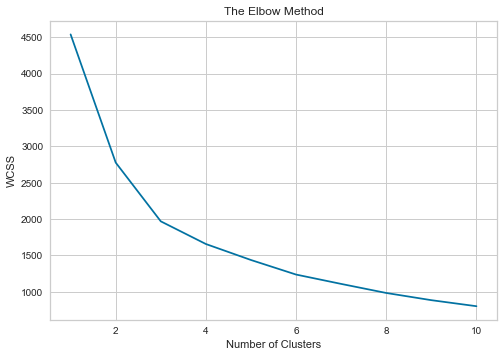

In [210]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']])
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.46395857590350603
For n_clusters = 3 The average silhouette_score is : 0.3141098342286715
For n_clusters = 4 The average silhouette_score is : 0.33266095389417016
For n_clusters = 5 The average silhouette_score is : 0.3226883766154032


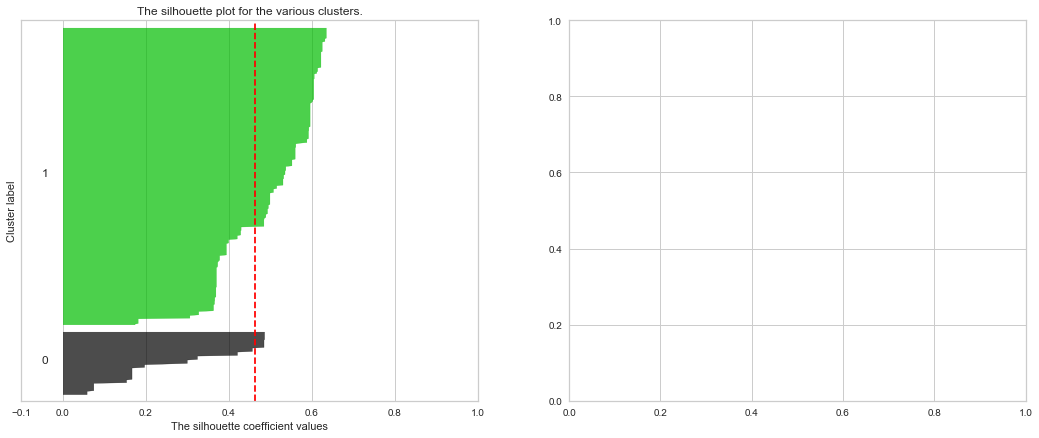

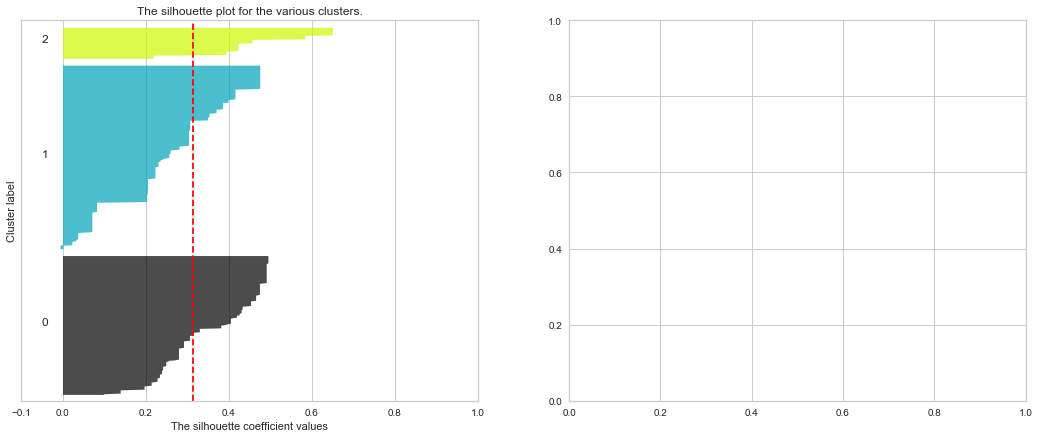

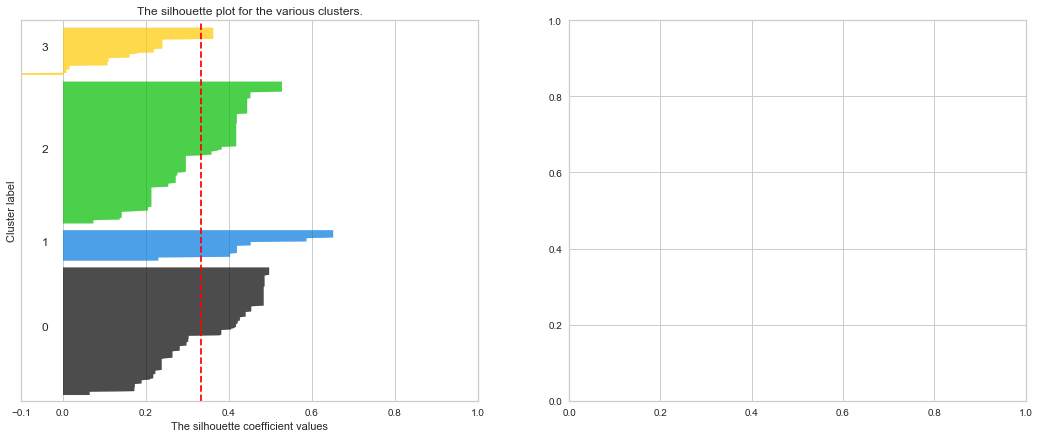

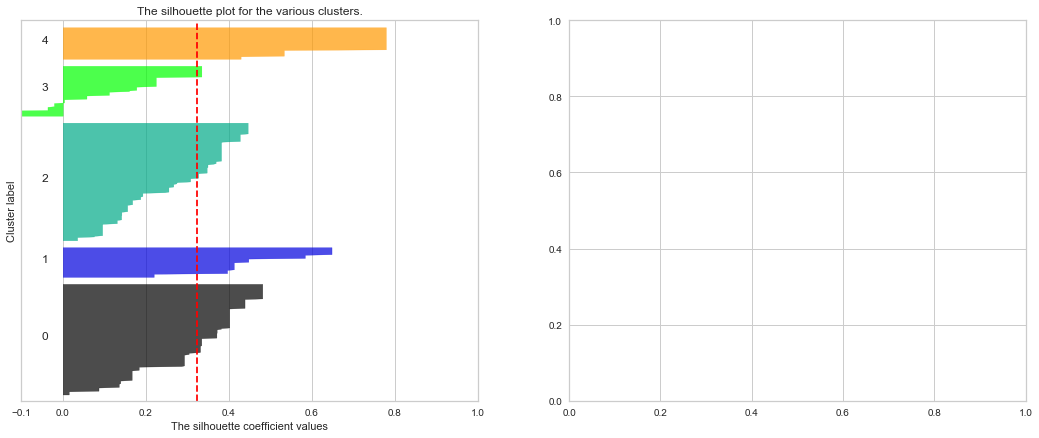

In [211]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
for n_clusters in range(2,6):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dfff) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']], cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()

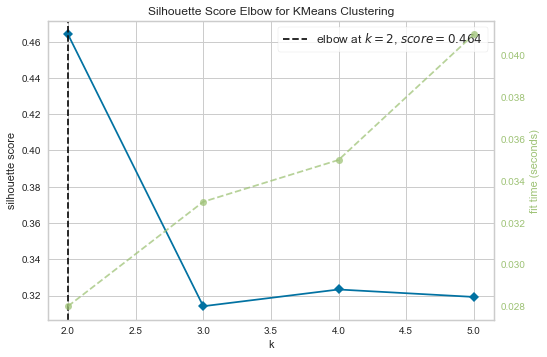

In [212]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,6),metric='silhouette', timings= True)
visualizer.fit(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

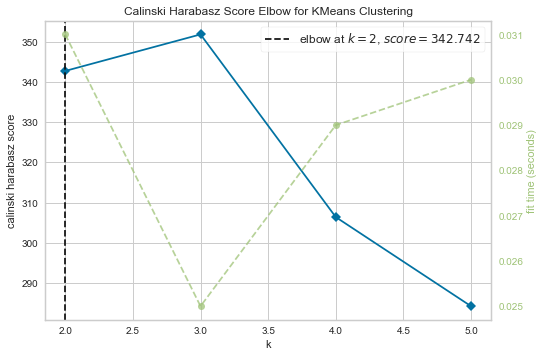

In [213]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,6),metric='calinski_harabasz', timings= True)
visualizer.fit(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

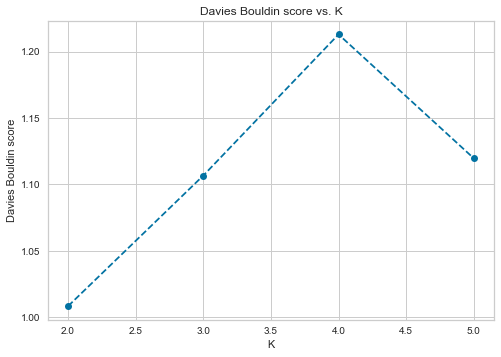

In [214]:
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)
# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']])
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']], model)
    
    return score
scores = []
centers = list(range(2,6))
for center in centers:
    scores.append(get_kmeans_score(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']], center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

In [215]:
kmeans = KMeans(n_clusters=2,random_state=2 )
kmeans.fit(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [216]:
labels = kmeans.labels_

In [217]:
for i in range(len(labels)):
    print('Index:',i,'Label:',labels[i])

Index: 0 Label: 0
Index: 1 Label: 0
Index: 2 Label: 0
Index: 3 Label: 0
Index: 4 Label: 0
Index: 5 Label: 0
Index: 6 Label: 0
Index: 7 Label: 1
Index: 8 Label: 0
Index: 9 Label: 0
Index: 10 Label: 0
Index: 11 Label: 0
Index: 12 Label: 0
Index: 13 Label: 0
Index: 14 Label: 0
Index: 15 Label: 0
Index: 16 Label: 0
Index: 17 Label: 0
Index: 18 Label: 1
Index: 19 Label: 1
Index: 20 Label: 1
Index: 21 Label: 1
Index: 22 Label: 0
Index: 23 Label: 0
Index: 24 Label: 0
Index: 25 Label: 0
Index: 26 Label: 0
Index: 27 Label: 0
Index: 28 Label: 0
Index: 29 Label: 0
Index: 30 Label: 0
Index: 31 Label: 0
Index: 32 Label: 0
Index: 33 Label: 0
Index: 34 Label: 0
Index: 35 Label: 0
Index: 36 Label: 0
Index: 37 Label: 0
Index: 38 Label: 0
Index: 39 Label: 0
Index: 40 Label: 0
Index: 41 Label: 0
Index: 42 Label: 0
Index: 43 Label: 0
Index: 44 Label: 0
Index: 45 Label: 0
Index: 46 Label: 0
Index: 47 Label: 1
Index: 48 Label: 0
Index: 49 Label: 1
Index: 50 Label: 0
Index: 51 Label: 0
Index: 52 Label: 0
Ind

In [218]:
l =pd.DataFrame(labels)
l[0].value_counts()

0    447
1     95
Name: 0, dtype: int64

In [219]:
exp1 = pd.DataFrame(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']].loc[19,:])
exp1[19].value_counts()

3.0    2
4.0    1
5.0    1
2.0    1
Name: 19, dtype: int64

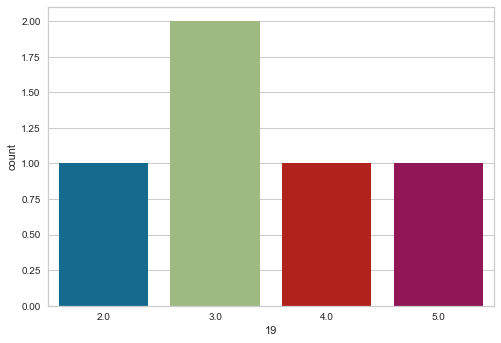

In [220]:
sns.countplot(x=dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']].loc[19,:])

In [221]:
labels[19]

1

In [222]:
exp2 = pd.DataFrame(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']].loc[314,:])
exp2[314].value_counts()

7.0    3
6.0    2
Name: 314, dtype: int64

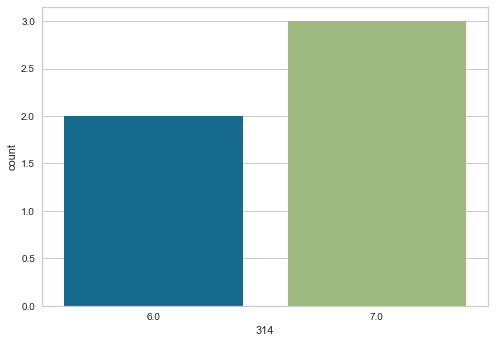

In [223]:
sns.countplot(x=dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']].loc[314,:])

In [224]:
labels[314]

0

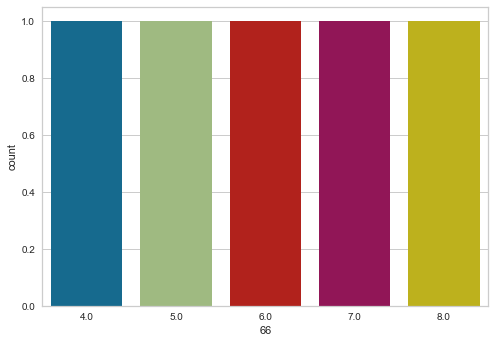

In [225]:
sns.countplot(x=dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']].loc[66,:])

In [226]:
labels[66]

1

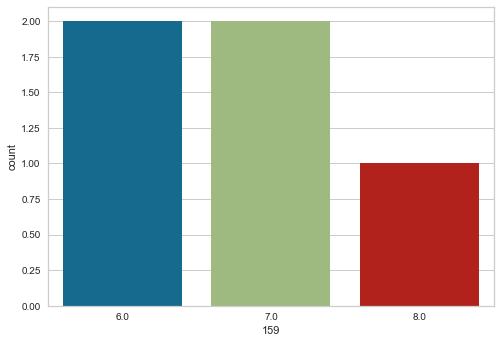

In [227]:
sns.countplot(x=dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']].loc[159,:])

In [228]:
labels[159]

0

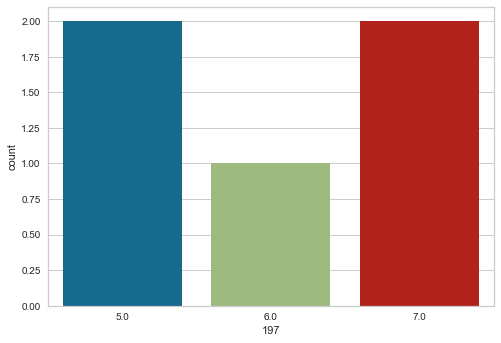

In [229]:
sns.countplot(x=dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']].loc[197,:])

In [230]:
labels[197]

1

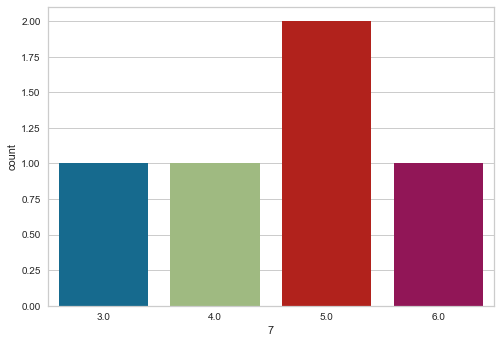

In [231]:
sns.countplot(x=dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']].loc[7,:])

In [232]:
labels[7]

1

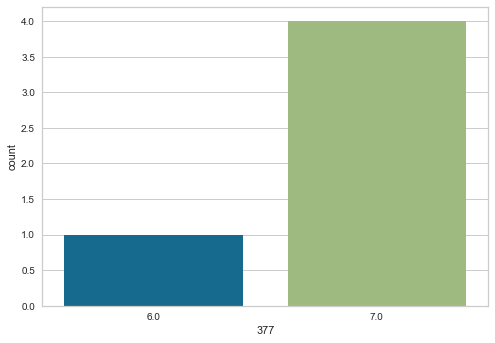

In [233]:
sns.countplot(x=dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']].loc[377,:])

In [234]:
labels[377]

0

In [235]:
Churn_NoChurnTT = kmeans

In [236]:
ex2 = [6,7,7,4,5]
ex2 = pd.DataFrame(ex2)
e2 = ex2.T
e2 = e2.rename(columns={x:y for x,y in zip(e2.columns,range(1,len(e2.columns)+1))})
e2

,1,2,3,4,5
0,6,7,7,4,5


In [237]:
kl = Churn_NoChurnTT.predict(e2.values)
print(kl)

[0]


In [238]:
l = pd.DataFrame(labels)
l

,0
0,0
1,0
2,0
3,0
4,0
...,...
537,0
538,0
539,0
540,0


In [239]:
dfc = pd.concat([dfff, l], axis=1)
dfc

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,0
0,6.0,5.0,7.0,7.0,6.0,1,1,1,0
1,6.0,7.0,6.0,6.0,5.0,7,7,2,0
2,7.0,7.0,7.0,7.0,6.0,10,10,1,0
3,9.0,9.0,6.0,7.0,6.0,12,12,1,0
4,9.0,9.0,6.0,7.0,6.0,13,13,1,0
...,...,...,...,...,...,...,...,...,...
537,8.0,8.0,4.0,5.0,4.0,1414,1414,1,0
538,8.0,8.0,4.0,5.0,4.0,1415,1415,1,0
539,8.0,8.0,4.0,5.0,4.0,1416,1416,1,0
540,6.0,7.0,3.0,6.0,5.0,1420,1420,3,0


In [240]:
df1=dfc.loc[dfc[0] == 1]
df1

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,0
7,4.0,3.0,5.0,6.0,5.0,19,19,1,1
18,3.0,2.0,3.0,3.0,4.0,46,46,1,1
19,3.0,2.0,3.0,5.0,4.0,47,47,1,1
20,3.0,2.0,3.0,5.0,4.0,48,48,1,1
21,4.0,5.0,3.0,4.0,4.0,51,51,1,1
...,...,...,...,...,...,...,...,...,...
522,4.0,3.0,5.0,6.0,5.0,1381,1381,1,1
533,3.0,2.0,3.0,3.0,4.0,1408,1408,1,1
534,3.0,2.0,3.0,5.0,4.0,1409,1409,1,1
535,3.0,2.0,3.0,5.0,4.0,1410,1410,1,1


In [241]:
dfch=df1.drop([0],axis=1)
dfch

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK
7,4.0,3.0,5.0,6.0,5.0,19,19,1
18,3.0,2.0,3.0,3.0,4.0,46,46,1
19,3.0,2.0,3.0,5.0,4.0,47,47,1
20,3.0,2.0,3.0,5.0,4.0,48,48,1
21,4.0,5.0,3.0,4.0,4.0,51,51,1
...,...,...,...,...,...,...,...,...
522,4.0,3.0,5.0,6.0,5.0,1381,1381,1
533,3.0,2.0,3.0,3.0,4.0,1408,1408,1
534,3.0,2.0,3.0,5.0,4.0,1409,1409,1
535,3.0,2.0,3.0,5.0,4.0,1410,1410,1


In [242]:
dfch.to_excel(r"C:\Users\meddhafer\notebook\data\dfch.xlsx", header=True)

In [243]:
dfch

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK
7,4.0,3.0,5.0,6.0,5.0,19,19,1
18,3.0,2.0,3.0,3.0,4.0,46,46,1
19,3.0,2.0,3.0,5.0,4.0,47,47,1
20,3.0,2.0,3.0,5.0,4.0,48,48,1
21,4.0,5.0,3.0,4.0,4.0,51,51,1
...,...,...,...,...,...,...,...,...
522,4.0,3.0,5.0,6.0,5.0,1381,1381,1
533,3.0,2.0,3.0,3.0,4.0,1408,1408,1
534,3.0,2.0,3.0,5.0,4.0,1409,1409,1
535,3.0,2.0,3.0,5.0,4.0,1410,1410,1


In [244]:
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_samples
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
from pylab import rcParams
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

In [245]:
Z = linkage(dfch[['Quality_Price']],'ward')

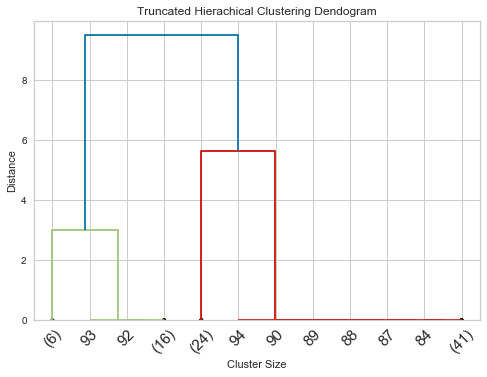

In [246]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachical Clustering Dendogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [247]:
Agg = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
Agg.fit_predict(dfch[['Quality_Price']])

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [248]:
labels = Agg.labels_
for i in range(len(labels)):
    print('Index:',dfch[['Quality_Price']].index[i],'Label:',labels[i])

Index: 7 Label: 0
Index: 18 Label: 1
Index: 19 Label: 1
Index: 20 Label: 1
Index: 21 Label: 0
Index: 47 Label: 0
Index: 49 Label: 0
Index: 56 Label: 0
Index: 57 Label: 0
Index: 58 Label: 0
Index: 59 Label: 1
Index: 62 Label: 0
Index: 66 Label: 0
Index: 71 Label: 0
Index: 81 Label: 0
Index: 97 Label: 0
Index: 108 Label: 1
Index: 109 Label: 1
Index: 110 Label: 1
Index: 111 Label: 0
Index: 137 Label: 0
Index: 139 Label: 0
Index: 146 Label: 0
Index: 147 Label: 0
Index: 148 Label: 0
Index: 149 Label: 1
Index: 152 Label: 0
Index: 156 Label: 0
Index: 192 Label: 0
Index: 193 Label: 0
Index: 194 Label: 0
Index: 195 Label: 0
Index: 196 Label: 0
Index: 197 Label: 0
Index: 206 Label: 0
Index: 217 Label: 1
Index: 218 Label: 1
Index: 219 Label: 1
Index: 220 Label: 0
Index: 246 Label: 0
Index: 248 Label: 0
Index: 255 Label: 0
Index: 256 Label: 0
Index: 257 Label: 0
Index: 258 Label: 1
Index: 261 Label: 0
Index: 265 Label: 0
Index: 270 Label: 0
Index: 280 Label: 0
Index: 296 Label: 0
Index: 307 Label:

In [249]:
l =pd.DataFrame(labels)
l[0].value_counts()

0    71
1    24
Name: 0, dtype: int64

In [250]:
dfch = dfch.values
dfch = pd.DataFrame(dfch)
dfch

,0,1,2,3,4,5,6,7
0,4.0,3.0,5.0,6.0,5.0,19.0,19.0,1.0
1,3.0,2.0,3.0,3.0,4.0,46.0,46.0,1.0
2,3.0,2.0,3.0,5.0,4.0,47.0,47.0,1.0
3,3.0,2.0,3.0,5.0,4.0,48.0,48.0,1.0
4,4.0,5.0,3.0,4.0,4.0,51.0,51.0,1.0
...,...,...,...,...,...,...,...,...
90,4.0,3.0,5.0,6.0,5.0,1381.0,1381.0,1.0
91,3.0,2.0,3.0,3.0,4.0,1408.0,1408.0,1.0
92,3.0,2.0,3.0,5.0,4.0,1409.0,1409.0,1.0
93,3.0,2.0,3.0,5.0,4.0,1410.0,1410.0,1.0


In [251]:
dfch['churn_Qual_Price'] = l

In [252]:
dfch.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 'churn_Qual_Price'], dtype='object')

In [253]:
dfch = dfch.rename(columns={0:'Quality_Price', 1:"RelationClient",2:"Commercial", 3:'Reseau', 4:'Internet', 5:'Client_PK', 6:'Company_PK', 7:'Region_PK'})
dfch

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price
0,4.0,3.0,5.0,6.0,5.0,19.0,19.0,1.0,0
1,3.0,2.0,3.0,3.0,4.0,46.0,46.0,1.0,1
2,3.0,2.0,3.0,5.0,4.0,47.0,47.0,1.0,1
3,3.0,2.0,3.0,5.0,4.0,48.0,48.0,1.0,1
4,4.0,5.0,3.0,4.0,4.0,51.0,51.0,1.0,0
...,...,...,...,...,...,...,...,...,...
90,4.0,3.0,5.0,6.0,5.0,1381.0,1381.0,1.0,0
91,3.0,2.0,3.0,3.0,4.0,1408.0,1408.0,1.0,1
92,3.0,2.0,3.0,5.0,4.0,1409.0,1409.0,1.0,1
93,3.0,2.0,3.0,5.0,4.0,1410.0,1410.0,1.0,1


In [254]:
j=0
for i in dfch['churn_Qual_Price']:
    if i==1:
        dfch['churn_Qual_Price'][j] = "Unsatisfied by quality_price"
        j=j+1
    else:
        dfch['churn_Qual_Price'][j] = "Other groups"
        j=j+1

C:\Users\meddhafer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\meddhafer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\meddhafer\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from

In [255]:
dfch

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price
0,4.0,3.0,5.0,6.0,5.0,19.0,19.0,1.0,Other groups
1,3.0,2.0,3.0,3.0,4.0,46.0,46.0,1.0,Unsatisfied by quality_price
2,3.0,2.0,3.0,5.0,4.0,47.0,47.0,1.0,Unsatisfied by quality_price
3,3.0,2.0,3.0,5.0,4.0,48.0,48.0,1.0,Unsatisfied by quality_price
4,4.0,5.0,3.0,4.0,4.0,51.0,51.0,1.0,Other groups
...,...,...,...,...,...,...,...,...,...
90,4.0,3.0,5.0,6.0,5.0,1381.0,1381.0,1.0,Other groups
91,3.0,2.0,3.0,3.0,4.0,1408.0,1408.0,1.0,Unsatisfied by quality_price
92,3.0,2.0,3.0,5.0,4.0,1409.0,1409.0,1.0,Unsatisfied by quality_price
93,3.0,2.0,3.0,5.0,4.0,1410.0,1410.0,1.0,Unsatisfied by quality_price


In [256]:
dfch.to_excel(r"C:\Users\meddhafer\notebook\data\dfch_qual.xlsx", header=True)

In [257]:
data = dfch[dfch['churn_Qual_Price']=='Unsatisfied by quality_price']
data

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price
1,3.0,2.0,3.0,3.0,4.0,46.0,46.0,1.0,Unsatisfied by quality_price
2,3.0,2.0,3.0,5.0,4.0,47.0,47.0,1.0,Unsatisfied by quality_price
3,3.0,2.0,3.0,5.0,4.0,48.0,48.0,1.0,Unsatisfied by quality_price
10,2.0,1.0,5.0,7.0,5.0,142.0,142.0,1.0,Unsatisfied by quality_price
16,3.0,2.0,3.0,3.0,4.0,288.0,288.0,1.0,Unsatisfied by quality_price
17,3.0,2.0,3.0,5.0,4.0,289.0,289.0,1.0,Unsatisfied by quality_price
18,3.0,2.0,3.0,5.0,4.0,290.0,290.0,1.0,Unsatisfied by quality_price
25,2.0,1.0,5.0,7.0,5.0,384.0,384.0,1.0,Unsatisfied by quality_price
35,3.0,2.0,3.0,3.0,4.0,564.0,564.0,1.0,Unsatisfied by quality_price
36,3.0,2.0,3.0,5.0,4.0,565.0,565.0,1.0,Unsatisfied by quality_price


In [258]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality_Price,24.0,2.750000,0.442326,2.0,2.75,3.0,3.00,3.0
RelationClient,24.0,1.750000,0.442326,1.0,1.75,2.0,2.00,2.0
Commercial,24.0,3.500000,0.884652,3.0,3.00,3.0,3.50,5.0
Reseau,24.0,5.000000,1.444630,3.0,4.50,5.0,5.50,7.0
Internet,24.0,4.250000,0.442326,4.0,4.00,4.0,4.25,5.0
Client_PK,24.0,720.708333,464.034058,46.0,289.75,733.0,1166.25,1410.0
Company_PK,24.0,720.708333,464.034058,46.0,289.75,733.0,1166.25,1410.0
Region_PK,24.0,1.125000,0.612372,1.0,1.00,1.0,1.00,4.0


In [259]:
for i in data.columns:
    print(data[i].value_counts())

3.0    18
2.0     6
Name: Quality_Price, dtype: int64
2.0    18
1.0     6
Name: RelationClient, dtype: int64
3.0    18
5.0     6
Name: Commercial, dtype: int64
5.0    12
7.0     6
3.0     6
Name: Reseau, dtype: int64
4.0    18
5.0     6
Name: Internet, dtype: int64
1410.0    1
1409.0    1
47.0      1
48.0      1
142.0     1
288.0     1
289.0     1
290.0     1
384.0     1
564.0     1
565.0     1
566.0     1
660.0     1
806.0     1
807.0     1
808.0     1
902.0     1
1095.0    1
1166.0    1
1167.0    1
1168.0    1
1262.0    1
1408.0    1
46.0      1
Name: Client_PK, dtype: int64
1410.0    1
1409.0    1
47.0      1
48.0      1
142.0     1
288.0     1
289.0     1
290.0     1
384.0     1
564.0     1
565.0     1
566.0     1
660.0     1
806.0     1
807.0     1
808.0     1
902.0     1
1095.0    1
1166.0    1
1167.0    1
1168.0    1
1262.0    1
1408.0    1
46.0      1
Name: Company_PK, dtype: int64
1.0    23
4.0     1
Name: Region_PK, dtype: int64
Unsatisfied by quality_price    24
Name: churn_

In [260]:
data1 = dfch[dfch['churn_Qual_Price']=='Other groups']
data1

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price
0,4.0,3.0,5.0,6.0,5.0,19.0,19.0,1.0,Other groups
4,4.0,5.0,3.0,4.0,4.0,51.0,51.0,1.0,Other groups
5,4.0,5.0,4.0,4.0,6.0,111.0,111.0,1.0,Other groups
6,5.0,6.0,3.0,8.0,6.0,113.0,113.0,1.0,Other groups
7,4.0,6.0,6.0,7.0,6.0,126.0,126.0,2.0,Other groups
...,...,...,...,...,...,...,...,...,...
87,4.0,5.0,7.0,8.0,6.0,1299.0,1299.0,1.0,Other groups
88,4.0,3.0,5.0,6.0,5.0,1314.0,1314.0,1.0,Other groups
89,4.0,3.0,5.0,6.0,5.0,1341.0,1341.0,1.0,Other groups
90,4.0,3.0,5.0,6.0,5.0,1381.0,1381.0,1.0,Other groups


In [261]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality_Price,71.0,4.338028,0.476405,4.0,4.0,4.0,5.0,5.0
RelationClient,71.0,4.915493,1.052161,3.0,4.5,5.0,6.0,6.0
Commercial,71.0,5.464789,1.442527,3.0,4.5,6.0,7.0,7.0
Reseau,71.0,6.478873,1.263319,4.0,6.0,7.0,7.0,8.0
Internet,71.0,5.732394,0.716295,4.0,5.5,6.0,6.0,7.0
Client_PK,71.0,730.450704,397.435162,19.0,386.0,712.0,1065.0,1413.0
Company_PK,71.0,730.450704,397.435162,19.0,386.0,712.0,1065.0,1413.0
Region_PK,71.0,1.507042,0.714608,1.0,1.0,1.0,2.0,4.0


In [262]:
for i in data1.columns:
    print(data1[i].value_counts())

4.0    47
5.0    24
Name: Quality_Price, dtype: int64
5.0    29
6.0    24
3.0    12
4.0     6
Name: RelationClient, dtype: int64
7.0    22
6.0    19
3.0    12
5.0    12
4.0     6
Name: Commercial, dtype: int64
7.0    36
4.0    12
6.0    12
8.0    11
Name: Reseau, dtype: int64
6.0    48
5.0    12
4.0     6
7.0     5
Name: Internet, dtype: int64
1413.0    1
513.0     1
421.0     1
508.0     1
509.0     1
         ..
1028.0    1
1030.0    1
1064.0    1
1066.0    1
19.0      1
Name: Client_PK, Length: 71, dtype: int64
1413.0    1
513.0     1
421.0     1
508.0     1
509.0     1
         ..
1028.0    1
1030.0    1
1064.0    1
1066.0    1
19.0      1
Name: Company_PK, Length: 71, dtype: int64
1.0    41
2.0    27
4.0     3
Name: Region_PK, dtype: int64
Other groups    71
Name: churn_Qual_Price, dtype: int64


In [263]:
Z = linkage(dfch[['RelationClient']],'ward')

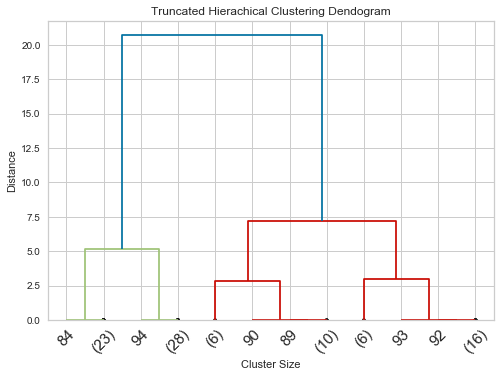

In [264]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachical Clustering Dendogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [265]:
Agg = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
Agg.fit_predict(dfch[['RelationClient']])

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [266]:
labels = Agg.labels_
for i in range(len(labels)):
    print('Index:',dfch[['RelationClient']].index[i],'Label:',labels[i])

Index: 0 Label: 0
Index: 1 Label: 0
Index: 2 Label: 0
Index: 3 Label: 0
Index: 4 Label: 1
Index: 5 Label: 1
Index: 6 Label: 1
Index: 7 Label: 1
Index: 8 Label: 1
Index: 9 Label: 1
Index: 10 Label: 0
Index: 11 Label: 0
Index: 12 Label: 1
Index: 13 Label: 0
Index: 14 Label: 0
Index: 15 Label: 0
Index: 16 Label: 0
Index: 17 Label: 0
Index: 18 Label: 0
Index: 19 Label: 1
Index: 20 Label: 1
Index: 21 Label: 1
Index: 22 Label: 1
Index: 23 Label: 1
Index: 24 Label: 1
Index: 25 Label: 0
Index: 26 Label: 0
Index: 27 Label: 1
Index: 28 Label: 1
Index: 29 Label: 1
Index: 30 Label: 1
Index: 31 Label: 1
Index: 32 Label: 1
Index: 33 Label: 1
Index: 34 Label: 0
Index: 35 Label: 0
Index: 36 Label: 0
Index: 37 Label: 0
Index: 38 Label: 1
Index: 39 Label: 1
Index: 40 Label: 1
Index: 41 Label: 1
Index: 42 Label: 1
Index: 43 Label: 1
Index: 44 Label: 0
Index: 45 Label: 0
Index: 46 Label: 1
Index: 47 Label: 0
Index: 48 Label: 0
Index: 49 Label: 0
Index: 50 Label: 0
Index: 51 Label: 0
Index: 52 Label: 0
Ind

In [267]:
l =pd.DataFrame(labels)
l[0].value_counts()

1    53
0    42
Name: 0, dtype: int64

In [268]:
dfch['churn_Client'] = l

In [269]:
dfch

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price,churn_Client
0,4.0,3.0,5.0,6.0,5.0,19.0,19.0,1.0,Other groups,0
1,3.0,2.0,3.0,3.0,4.0,46.0,46.0,1.0,Unsatisfied by quality_price,0
2,3.0,2.0,3.0,5.0,4.0,47.0,47.0,1.0,Unsatisfied by quality_price,0
3,3.0,2.0,3.0,5.0,4.0,48.0,48.0,1.0,Unsatisfied by quality_price,0
4,4.0,5.0,3.0,4.0,4.0,51.0,51.0,1.0,Other groups,1
...,...,...,...,...,...,...,...,...,...,...
90,4.0,3.0,5.0,6.0,5.0,1381.0,1381.0,1.0,Other groups,0
91,3.0,2.0,3.0,3.0,4.0,1408.0,1408.0,1.0,Unsatisfied by quality_price,0
92,3.0,2.0,3.0,5.0,4.0,1409.0,1409.0,1.0,Unsatisfied by quality_price,0
93,3.0,2.0,3.0,5.0,4.0,1410.0,1410.0,1.0,Unsatisfied by quality_price,0


In [270]:
data1 = dfch[dfch['churn_Client']==1]
data1

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price,churn_Client
4,4.0,5.0,3.0,4.0,4.0,51.0,51.0,1.0,Other groups,1
5,4.0,5.0,4.0,4.0,6.0,111.0,111.0,1.0,Other groups,1
6,5.0,6.0,3.0,8.0,6.0,113.0,113.0,1.0,Other groups,1
7,4.0,6.0,6.0,7.0,6.0,126.0,126.0,2.0,Other groups,1
8,4.0,6.0,6.0,7.0,6.0,127.0,127.0,2.0,Other groups,1
9,4.0,6.0,6.0,7.0,6.0,128.0,128.0,2.0,Other groups,1
12,4.0,5.0,7.0,8.0,6.0,179.0,179.0,1.0,Other groups,1
19,4.0,5.0,3.0,4.0,4.0,293.0,293.0,1.0,Other groups,1
20,4.0,5.0,4.0,4.0,6.0,353.0,353.0,1.0,Other groups,1
21,5.0,6.0,3.0,8.0,6.0,355.0,355.0,1.0,Other groups,1


In [271]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality_Price,53.0,4.339623,0.478113,4.0,4.0,4.0,5.0,5.0
RelationClient,53.0,5.452830,0.502533,5.0,5.0,5.0,6.0,6.0
Commercial,53.0,5.396226,1.573086,3.0,4.0,6.0,7.0,7.0
Reseau,53.0,6.528302,1.435856,4.0,7.0,7.0,7.0,8.0
Internet,53.0,5.773585,0.639757,4.0,6.0,6.0,6.0,6.0
Client_PK,53.0,729.660377,380.257703,51.0,421.0,697.0,1031.0,1413.0
Company_PK,53.0,729.660377,380.257703,51.0,421.0,697.0,1031.0,1413.0
Region_PK,53.0,1.566038,0.772345,1.0,1.0,1.0,2.0,4.0
churn_Client,53.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [272]:
for i in data1.columns:
    print(data1[i].value_counts())

4.0    35
5.0    18
Name: Quality_Price, dtype: int64
5.0    29
6.0    24
Name: RelationClient, dtype: int64
6.0    19
7.0    16
3.0    12
4.0     6
Name: Commercial, dtype: int64
7.0    30
4.0    12
8.0    11
Name: Reseau, dtype: int64
6.0    47
4.0     6
Name: Internet, dtype: int64
1413.0    1
646.0     1
644.0     1
631.0     1
629.0     1
569.0     1
513.0     1
512.0     1
511.0     1
510.0     1
509.0     1
508.0     1
421.0     1
370.0     1
369.0     1
368.0     1
355.0     1
353.0     1
293.0     1
179.0     1
128.0     1
127.0     1
126.0     1
113.0     1
111.0     1
645.0     1
697.0     1
1299.0    1
811.0     1
1247.0    1
1233.0    1
1231.0    1
1171.0    1
1081.0    1
1079.0    1
1031.0    1
1029.0    1
1027.0    1
1248.0    1
1246.0    1
1080.0    1
1066.0    1
1064.0    1
1030.0    1
1028.0    1
1026.0    1
939.0     1
888.0     1
887.0     1
886.0     1
873.0     1
871.0     1
51.0      1
Name: Client_PK, dtype: int64
1413.0    1
646.0     1
644.0     1
631.0     1


In [273]:
data1 = dfch[dfch['churn_Client']==0]
data1

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price,churn_Client
0,4.0,3.0,5.0,6.0,5.0,19.0,19.0,1.0,Other groups,0
1,3.0,2.0,3.0,3.0,4.0,46.0,46.0,1.0,Unsatisfied by quality_price,0
2,3.0,2.0,3.0,5.0,4.0,47.0,47.0,1.0,Unsatisfied by quality_price,0
3,3.0,2.0,3.0,5.0,4.0,48.0,48.0,1.0,Unsatisfied by quality_price,0
10,2.0,1.0,5.0,7.0,5.0,142.0,142.0,1.0,Unsatisfied by quality_price,0
11,5.0,4.0,7.0,7.0,7.0,160.0,160.0,2.0,Other groups,0
13,4.0,3.0,5.0,6.0,5.0,194.0,194.0,1.0,Other groups,0
14,4.0,3.0,5.0,6.0,5.0,221.0,221.0,1.0,Other groups,0
15,4.0,3.0,5.0,6.0,5.0,261.0,261.0,1.0,Other groups,0
16,3.0,2.0,3.0,3.0,4.0,288.0,288.0,1.0,Unsatisfied by quality_price,0


In [274]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality_Price,42.0,3.428571,0.914460,2.0,3.00,3.0,4.00,5.0
RelationClient,42.0,2.428571,0.914460,1.0,2.00,2.0,3.00,4.0
Commercial,42.0,4.428571,1.416675,3.0,3.00,5.0,5.00,7.0
Reseau,42.0,5.571429,1.309307,3.0,5.00,6.0,7.00,7.0
Internet,42.0,4.833333,0.960606,4.0,4.00,5.0,5.00,7.0
Client_PK,42.0,725.880952,455.099678,19.0,289.25,725.5,1159.25,1410.0
Company_PK,42.0,725.880952,455.099678,19.0,289.25,725.5,1159.25,1410.0
Region_PK,42.0,1.214286,0.564637,1.0,1.00,1.0,1.00,4.0
churn_Client,42.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [275]:
for i in data1.columns:
    print(data1[i].value_counts())

3.0    18
4.0    12
5.0     6
2.0     6
Name: Quality_Price, dtype: int64
2.0    18
3.0    12
4.0     6
1.0     6
Name: RelationClient, dtype: int64
3.0    18
5.0    18
7.0     6
Name: Commercial, dtype: int64
7.0    12
5.0    12
6.0    12
3.0     6
Name: Reseau, dtype: int64
4.0    18
5.0    18
7.0     5
6.0     1
Name: Internet, dtype: int64
1410.0    1
289.0     1
660.0     1
566.0     1
565.0     1
564.0     1
537.0     1
402.0     1
384.0     1
290.0     1
288.0     1
1409.0    1
261.0     1
221.0     1
194.0     1
160.0     1
142.0     1
48.0      1
47.0      1
46.0      1
678.0     1
712.0     1
739.0     1
779.0     1
1408.0    1
1381.0    1
1341.0    1
1314.0    1
1280.0    1
1262.0    1
1168.0    1
1167.0    1
1166.0    1
1139.0    1
1113.0    1
1095.0    1
920.0     1
902.0     1
808.0     1
807.0     1
806.0     1
19.0      1
Name: Client_PK, dtype: int64
1410.0    1
289.0     1
660.0     1
566.0     1
565.0     1
564.0     1
537.0     1
402.0     1
384.0     1
290.0     1


In [276]:
j=0
for i in dfch['churn_Client']:
    if i==0:
        dfch['churn_Client'][j] = "Unsatisfied by relationship with customers"
        j=j+1
    else:
        dfch['churn_Client'][j] = "Other groups"
        j=j+1

C:\Users\meddhafer\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\meddhafer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\meddhafer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [277]:
dfch

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price,churn_Client
0,4.0,3.0,5.0,6.0,5.0,19.0,19.0,1.0,Other groups,Unsatisfied by relationship with customers
1,3.0,2.0,3.0,3.0,4.0,46.0,46.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers
2,3.0,2.0,3.0,5.0,4.0,47.0,47.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers
3,3.0,2.0,3.0,5.0,4.0,48.0,48.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers
4,4.0,5.0,3.0,4.0,4.0,51.0,51.0,1.0,Other groups,Other groups
...,...,...,...,...,...,...,...,...,...,...
90,4.0,3.0,5.0,6.0,5.0,1381.0,1381.0,1.0,Other groups,Unsatisfied by relationship with customers
91,3.0,2.0,3.0,3.0,4.0,1408.0,1408.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers
92,3.0,2.0,3.0,5.0,4.0,1409.0,1409.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers
93,3.0,2.0,3.0,5.0,4.0,1410.0,1410.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers


In [278]:
Z = linkage(dfch[['Commercial']],'ward')

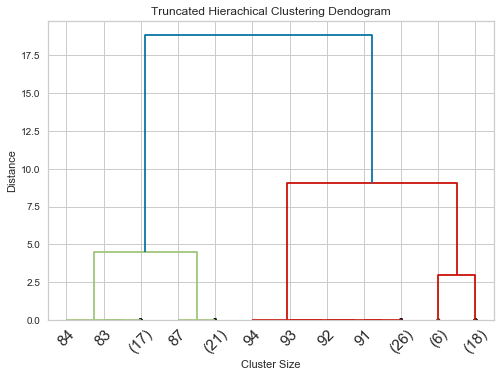

In [279]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachical Clustering Dendogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [280]:
Agg = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
Agg.fit_predict(dfch[['Commercial']])

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [281]:
labels = Agg.labels_
for i in range(len(labels)):
    print('Index:',dfch[['Commercial']].index[i],'Label:',labels[i])

Index: 0 Label: 0
Index: 1 Label: 0
Index: 2 Label: 0
Index: 3 Label: 0
Index: 4 Label: 0
Index: 5 Label: 0
Index: 6 Label: 0
Index: 7 Label: 1
Index: 8 Label: 1
Index: 9 Label: 1
Index: 10 Label: 0
Index: 11 Label: 1
Index: 12 Label: 1
Index: 13 Label: 0
Index: 14 Label: 0
Index: 15 Label: 0
Index: 16 Label: 0
Index: 17 Label: 0
Index: 18 Label: 0
Index: 19 Label: 0
Index: 20 Label: 0
Index: 21 Label: 0
Index: 22 Label: 1
Index: 23 Label: 1
Index: 24 Label: 1
Index: 25 Label: 0
Index: 26 Label: 1
Index: 27 Label: 1
Index: 28 Label: 1
Index: 29 Label: 1
Index: 30 Label: 1
Index: 31 Label: 1
Index: 32 Label: 1
Index: 33 Label: 1
Index: 34 Label: 0
Index: 35 Label: 0
Index: 36 Label: 0
Index: 37 Label: 0
Index: 38 Label: 0
Index: 39 Label: 0
Index: 40 Label: 0
Index: 41 Label: 1
Index: 42 Label: 1
Index: 43 Label: 1
Index: 44 Label: 0
Index: 45 Label: 1
Index: 46 Label: 1
Index: 47 Label: 0
Index: 48 Label: 0
Index: 49 Label: 0
Index: 50 Label: 0
Index: 51 Label: 0
Index: 52 Label: 0
Ind

In [282]:
l =pd.DataFrame(labels)
l[0].value_counts()

0    54
1    41
Name: 0, dtype: int64

In [283]:
dfch['churn_Commerciale'] = l

In [284]:
dfch

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price,churn_Client,churn_Commerciale
0,4.0,3.0,5.0,6.0,5.0,19.0,19.0,1.0,Other groups,Unsatisfied by relationship with customers,0
1,3.0,2.0,3.0,3.0,4.0,46.0,46.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,0
2,3.0,2.0,3.0,5.0,4.0,47.0,47.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,0
3,3.0,2.0,3.0,5.0,4.0,48.0,48.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,0
4,4.0,5.0,3.0,4.0,4.0,51.0,51.0,1.0,Other groups,Other groups,0
...,...,...,...,...,...,...,...,...,...,...,...
90,4.0,3.0,5.0,6.0,5.0,1381.0,1381.0,1.0,Other groups,Unsatisfied by relationship with customers,0
91,3.0,2.0,3.0,3.0,4.0,1408.0,1408.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,0
92,3.0,2.0,3.0,5.0,4.0,1409.0,1409.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,0
93,3.0,2.0,3.0,5.0,4.0,1410.0,1410.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,0


In [285]:
data1 = dfch[dfch['churn_Commerciale']==0]
data1

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price,churn_Client,churn_Commerciale
0,4.0,3.0,5.0,6.0,5.0,19.0,19.0,1.0,Other groups,Unsatisfied by relationship with customers,0
1,3.0,2.0,3.0,3.0,4.0,46.0,46.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,0
2,3.0,2.0,3.0,5.0,4.0,47.0,47.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,0
3,3.0,2.0,3.0,5.0,4.0,48.0,48.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,0
4,4.0,5.0,3.0,4.0,4.0,51.0,51.0,1.0,Other groups,Other groups,0
5,4.0,5.0,4.0,4.0,6.0,111.0,111.0,1.0,Other groups,Other groups,0
6,5.0,6.0,3.0,8.0,6.0,113.0,113.0,1.0,Other groups,Other groups,0
10,2.0,1.0,5.0,7.0,5.0,142.0,142.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,0
13,4.0,3.0,5.0,6.0,5.0,194.0,194.0,1.0,Other groups,Unsatisfied by relationship with customers,0
14,4.0,3.0,5.0,6.0,5.0,221.0,221.0,1.0,Other groups,Unsatisfied by relationship with customers,0


In [286]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality_Price,54.0,3.555556,0.839287,2.0,3.00,4.0,4.00,5.0
RelationClient,54.0,3.222222,1.632993,1.0,2.00,3.0,5.00,6.0
Commercial,54.0,3.777778,0.924849,3.0,3.00,3.0,5.00,5.0
Reseau,54.0,5.333333,1.504710,3.0,4.00,5.0,6.00,8.0
Internet,54.0,4.777778,0.793052,4.0,4.00,5.0,5.00,6.0
Client_PK,54.0,718.000000,450.263319,19.0,290.75,725.5,1159.25,1413.0
Company_PK,54.0,718.000000,450.263319,19.0,290.75,725.5,1159.25,1413.0
Region_PK,54.0,1.055556,0.408248,1.0,1.00,1.0,1.00,4.0
churn_Commerciale,54.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [287]:
for i in data1.columns:
    print(data1[i].value_counts())

4.0    24
3.0    18
2.0     6
5.0     6
Name: Quality_Price, dtype: int64
2.0    18
5.0    12
3.0    12
1.0     6
6.0     6
Name: RelationClient, dtype: int64
3.0    30
5.0    18
4.0     6
Name: Commercial, dtype: int64
4.0    12
5.0    12
6.0    12
7.0     6
8.0     6
3.0     6
Name: Reseau, dtype: int64
4.0    24
5.0    18
6.0    12
Name: Internet, dtype: int64
1413.0    1
290.0     1
631.0     1
629.0     1
569.0     1
566.0     1
565.0     1
564.0     1
537.0     1
384.0     1
355.0     1
353.0     1
293.0     1
289.0     1
1409.0    1
288.0     1
261.0     1
221.0     1
194.0     1
142.0     1
113.0     1
111.0     1
51.0      1
48.0      1
47.0      1
46.0      1
660.0     1
712.0     1
739.0     1
779.0     1
1381.0    1
1341.0    1
1233.0    1
1231.0    1
1171.0    1
1167.0    1
1139.0    1
1095.0    1
1410.0    1
1408.0    1
1314.0    1
1262.0    1
1168.0    1
1166.0    1
1066.0    1
1064.0    1
902.0     1
873.0     1
871.0     1
811.0     1
808.0     1
807.0     1
806.0     

In [288]:
j=0
for i in dfch['churn_Commerciale']:
    if i==0:
        dfch['churn_Commerciale'][j] = "Unsatisfied by Commercial sector"
        j=j+1
    else:
        dfch['churn_Commerciale'][j] = "Other groups"
        j=j+1

C:\Users\meddhafer\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\meddhafer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\meddhafer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [289]:
Z = linkage(dfch[['Reseau']],'ward')

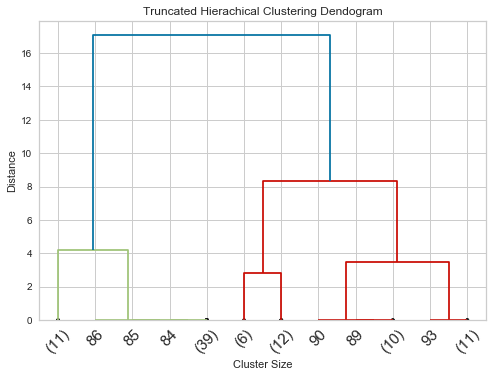

In [290]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachical Clustering Dendogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [291]:
Agg = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
Agg.fit_predict(dfch[['Reseau']])

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [292]:
labels = Agg.labels_
for i in range(len(labels)):
    print('Index:',dfch[['Reseau']].index[i],'Label:',labels[i])

Index: 0 Label: 0
Index: 1 Label: 0
Index: 2 Label: 0
Index: 3 Label: 0
Index: 4 Label: 0
Index: 5 Label: 0
Index: 6 Label: 1
Index: 7 Label: 1
Index: 8 Label: 1
Index: 9 Label: 1
Index: 10 Label: 1
Index: 11 Label: 1
Index: 12 Label: 1
Index: 13 Label: 0
Index: 14 Label: 0
Index: 15 Label: 0
Index: 16 Label: 0
Index: 17 Label: 0
Index: 18 Label: 0
Index: 19 Label: 0
Index: 20 Label: 0
Index: 21 Label: 1
Index: 22 Label: 1
Index: 23 Label: 1
Index: 24 Label: 1
Index: 25 Label: 1
Index: 26 Label: 1
Index: 27 Label: 1
Index: 28 Label: 1
Index: 29 Label: 1
Index: 30 Label: 1
Index: 31 Label: 1
Index: 32 Label: 1
Index: 33 Label: 1
Index: 34 Label: 0
Index: 35 Label: 0
Index: 36 Label: 0
Index: 37 Label: 0
Index: 38 Label: 0
Index: 39 Label: 0
Index: 40 Label: 1
Index: 41 Label: 1
Index: 42 Label: 1
Index: 43 Label: 1
Index: 44 Label: 1
Index: 45 Label: 1
Index: 46 Label: 1
Index: 47 Label: 0
Index: 48 Label: 0
Index: 49 Label: 0
Index: 50 Label: 0
Index: 51 Label: 0
Index: 52 Label: 0
Ind

In [293]:
l =pd.DataFrame(labels)
l[0].value_counts()

1    53
0    42
Name: 0, dtype: int64

In [294]:
dfch['churn_Reseau'] = l

In [295]:
dfch

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price,churn_Client,churn_Commerciale,churn_Reseau
0,4.0,3.0,5.0,6.0,5.0,19.0,19.0,1.0,Other groups,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,0
1,3.0,2.0,3.0,3.0,4.0,46.0,46.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,0
2,3.0,2.0,3.0,5.0,4.0,47.0,47.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,0
3,3.0,2.0,3.0,5.0,4.0,48.0,48.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,0
4,4.0,5.0,3.0,4.0,4.0,51.0,51.0,1.0,Other groups,Other groups,Unsatisfied by Commercial sector,0
...,...,...,...,...,...,...,...,...,...,...,...,...
90,4.0,3.0,5.0,6.0,5.0,1381.0,1381.0,1.0,Other groups,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,0
91,3.0,2.0,3.0,3.0,4.0,1408.0,1408.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,0
92,3.0,2.0,3.0,5.0,4.0,1409.0,1409.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,0
93,3.0,2.0,3.0,5.0,4.0,1410.0,1410.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,0


In [296]:
data1 = dfch[dfch['churn_Reseau']==0]
data1

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price,churn_Client,churn_Commerciale,churn_Reseau
0,4.0,3.0,5.0,6.0,5.0,19.0,19.0,1.0,Other groups,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,0
1,3.0,2.0,3.0,3.0,4.0,46.0,46.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,0
2,3.0,2.0,3.0,5.0,4.0,47.0,47.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,0
3,3.0,2.0,3.0,5.0,4.0,48.0,48.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,0
4,4.0,5.0,3.0,4.0,4.0,51.0,51.0,1.0,Other groups,Other groups,Unsatisfied by Commercial sector,0
5,4.0,5.0,4.0,4.0,6.0,111.0,111.0,1.0,Other groups,Other groups,Unsatisfied by Commercial sector,0
13,4.0,3.0,5.0,6.0,5.0,194.0,194.0,1.0,Other groups,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,0
14,4.0,3.0,5.0,6.0,5.0,221.0,221.0,1.0,Other groups,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,0
15,4.0,3.0,5.0,6.0,5.0,261.0,261.0,1.0,Other groups,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,0
16,3.0,2.0,3.0,3.0,4.0,288.0,288.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,0


In [297]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality_Price,42.0,3.571429,0.500870,3.0,3.00,4.0,4.00,4.0
RelationClient,42.0,3.142857,1.260496,2.0,2.00,3.0,5.00,5.0
Commercial,42.0,3.714286,0.891305,3.0,3.00,3.0,5.00,5.0
Reseau,42.0,4.714286,1.042645,3.0,4.00,5.0,6.00,6.0
Internet,42.0,4.571429,0.737261,4.0,4.00,4.0,5.00,6.0
Client_PK,42.0,715.619048,466.185661,19.0,289.25,725.5,1166.75,1413.0
Company_PK,42.0,715.619048,466.185661,19.0,289.25,725.5,1166.75,1413.0
Region_PK,42.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
churn_Reseau,42.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [298]:
for i in data1.columns:
    print(data1[i].value_counts())

4.0    24
3.0    18
Name: Quality_Price, dtype: int64
2.0    18
5.0    12
3.0    12
Name: RelationClient, dtype: int64
3.0    24
5.0    12
4.0     6
Name: Commercial, dtype: int64
4.0    12
5.0    12
6.0    12
3.0     6
Name: Reseau, dtype: int64
4.0    24
5.0    12
6.0     6
Name: Internet, dtype: int64
1413.0    1
289.0     1
569.0     1
566.0     1
565.0     1
564.0     1
537.0     1
353.0     1
293.0     1
290.0     1
288.0     1
1410.0    1
261.0     1
221.0     1
194.0     1
111.0     1
51.0      1
48.0      1
47.0      1
46.0      1
629.0     1
712.0     1
739.0     1
779.0     1
1409.0    1
1408.0    1
1381.0    1
1341.0    1
1314.0    1
1231.0    1
1171.0    1
1168.0    1
1167.0    1
1166.0    1
1139.0    1
1064.0    1
871.0     1
811.0     1
808.0     1
807.0     1
806.0     1
19.0      1
Name: Client_PK, dtype: int64
1413.0    1
289.0     1
569.0     1
566.0     1
565.0     1
564.0     1
537.0     1
353.0     1
293.0     1
290.0     1
288.0     1
1410.0    1
261.0     1
221.

In [299]:
j=0
for i in dfch['churn_Reseau']:
    if i==0:
        dfch['churn_Reseau'][j] = "Unsatisfied by Network"
        j=j+1
    else:
        dfch['churn_Reseau'][j] = "Other groups"
        j=j+1

C:\Users\meddhafer\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\meddhafer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\meddhafer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [300]:
Z = linkage(dfch[['Internet']],'ward')

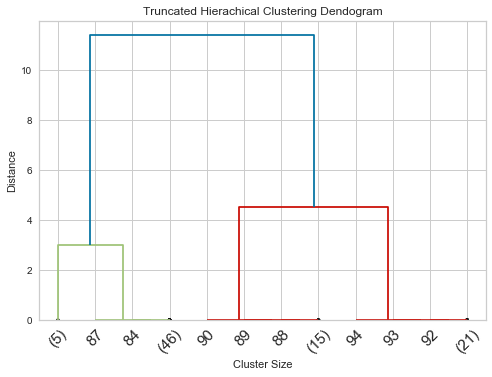

In [301]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachical Clustering Dendogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [302]:
Agg = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
Agg.fit_predict(dfch[['Internet']])

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [303]:
labels = Agg.labels_
for i in range(len(labels)):
    print('Index:',dfch[['Internet']].index[i],'Label:',labels[i])

Index: 0 Label: 0
Index: 1 Label: 0
Index: 2 Label: 0
Index: 3 Label: 0
Index: 4 Label: 0
Index: 5 Label: 1
Index: 6 Label: 1
Index: 7 Label: 1
Index: 8 Label: 1
Index: 9 Label: 1
Index: 10 Label: 0
Index: 11 Label: 1
Index: 12 Label: 1
Index: 13 Label: 0
Index: 14 Label: 0
Index: 15 Label: 0
Index: 16 Label: 0
Index: 17 Label: 0
Index: 18 Label: 0
Index: 19 Label: 0
Index: 20 Label: 1
Index: 21 Label: 1
Index: 22 Label: 1
Index: 23 Label: 1
Index: 24 Label: 1
Index: 25 Label: 0
Index: 26 Label: 1
Index: 27 Label: 1
Index: 28 Label: 1
Index: 29 Label: 1
Index: 30 Label: 1
Index: 31 Label: 1
Index: 32 Label: 1
Index: 33 Label: 1
Index: 34 Label: 0
Index: 35 Label: 0
Index: 36 Label: 0
Index: 37 Label: 0
Index: 38 Label: 0
Index: 39 Label: 1
Index: 40 Label: 1
Index: 41 Label: 1
Index: 42 Label: 1
Index: 43 Label: 1
Index: 44 Label: 0
Index: 45 Label: 1
Index: 46 Label: 1
Index: 47 Label: 0
Index: 48 Label: 0
Index: 49 Label: 0
Index: 50 Label: 0
Index: 51 Label: 0
Index: 52 Label: 0
Ind

In [304]:
l =pd.DataFrame(labels)
l[0].value_counts()

1    53
0    42
Name: 0, dtype: int64

In [305]:
dfch['churn_Internet'] = l

In [306]:
dfch

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price,churn_Client,churn_Commerciale,churn_Reseau,churn_Internet
0,4.0,3.0,5.0,6.0,5.0,19.0,19.0,1.0,Other groups,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,0
1,3.0,2.0,3.0,3.0,4.0,46.0,46.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,0
2,3.0,2.0,3.0,5.0,4.0,47.0,47.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,0
3,3.0,2.0,3.0,5.0,4.0,48.0,48.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,0
4,4.0,5.0,3.0,4.0,4.0,51.0,51.0,1.0,Other groups,Other groups,Unsatisfied by Commercial sector,Unsatisfied by Network,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,4.0,3.0,5.0,6.0,5.0,1381.0,1381.0,1.0,Other groups,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,0
91,3.0,2.0,3.0,3.0,4.0,1408.0,1408.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,0
92,3.0,2.0,3.0,5.0,4.0,1409.0,1409.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,0
93,3.0,2.0,3.0,5.0,4.0,1410.0,1410.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,0


In [307]:
data1 = dfch[dfch['churn_Internet']==0]
data1

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price,churn_Client,churn_Commerciale,churn_Reseau,churn_Internet
0,4.0,3.0,5.0,6.0,5.0,19.0,19.0,1.0,Other groups,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,0
1,3.0,2.0,3.0,3.0,4.0,46.0,46.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,0
2,3.0,2.0,3.0,5.0,4.0,47.0,47.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,0
3,3.0,2.0,3.0,5.0,4.0,48.0,48.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,0
4,4.0,5.0,3.0,4.0,4.0,51.0,51.0,1.0,Other groups,Other groups,Unsatisfied by Commercial sector,Unsatisfied by Network,0
10,2.0,1.0,5.0,7.0,5.0,142.0,142.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Other groups,0
13,4.0,3.0,5.0,6.0,5.0,194.0,194.0,1.0,Other groups,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,0
14,4.0,3.0,5.0,6.0,5.0,221.0,221.0,1.0,Other groups,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,0
15,4.0,3.0,5.0,6.0,5.0,261.0,261.0,1.0,Other groups,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,0
16,3.0,2.0,3.0,3.0,4.0,288.0,288.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,0


In [308]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality_Price,42.0,3.285714,0.708338,2.0,3.00,3.0,4.00,4.0
RelationClient,42.0,2.571429,1.192310,1.0,2.00,2.0,3.00,5.0
Commercial,42.0,3.857143,1.001741,3.0,3.00,3.0,5.00,5.0
Reseau,42.0,5.142857,1.260496,3.0,4.00,5.0,6.00,7.0
Internet,42.0,4.428571,0.500870,4.0,4.00,4.0,5.00,5.0
Client_PK,42.0,720.047619,466.258640,19.0,289.25,725.5,1166.75,1413.0
Company_PK,42.0,720.047619,466.258640,19.0,289.25,725.5,1166.75,1413.0
Region_PK,42.0,1.071429,0.462910,1.0,1.00,1.0,1.00,4.0
churn_Internet,42.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [309]:
for i in data1.columns:
    print(data1[i].value_counts())

3.0    18
4.0    18
2.0     6
Name: Quality_Price, dtype: int64
2.0    18
3.0    12
1.0     6
5.0     6
Name: RelationClient, dtype: int64
3.0    24
5.0    18
Name: Commercial, dtype: int64
5.0    12
6.0    12
7.0     6
4.0     6
3.0     6
Name: Reseau, dtype: int64
4.0    24
5.0    18
Name: Internet, dtype: int64
1413.0    1
289.0     1
569.0     1
566.0     1
565.0     1
564.0     1
537.0     1
384.0     1
293.0     1
290.0     1
288.0     1
1410.0    1
261.0     1
221.0     1
194.0     1
142.0     1
51.0      1
48.0      1
47.0      1
46.0      1
660.0     1
712.0     1
739.0     1
779.0     1
1409.0    1
1408.0    1
1381.0    1
1341.0    1
1314.0    1
1262.0    1
1171.0    1
1168.0    1
1167.0    1
1166.0    1
1139.0    1
1095.0    1
902.0     1
811.0     1
808.0     1
807.0     1
806.0     1
19.0      1
Name: Client_PK, dtype: int64
1413.0    1
289.0     1
569.0     1
566.0     1
565.0     1
564.0     1
537.0     1
384.0     1
293.0     1
290.0     1
288.0     1
1410.0    1
261.0 

In [310]:
j=0
for i in dfch['churn_Internet']:
    if i==0:
        dfch['churn_Internet'][j] = "Unsatisfied by Internet"
        j=j+1
    else:
        dfch['churn_Internet'][j] = "Other groups"
        j=j+1

C:\Users\meddhafer\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\meddhafer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\meddhafer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [311]:
dfch

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price,churn_Client,churn_Commerciale,churn_Reseau,churn_Internet
0,4.0,3.0,5.0,6.0,5.0,19.0,19.0,1.0,Other groups,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,Unsatisfied by Internet
1,3.0,2.0,3.0,3.0,4.0,46.0,46.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,Unsatisfied by Internet
2,3.0,2.0,3.0,5.0,4.0,47.0,47.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,Unsatisfied by Internet
3,3.0,2.0,3.0,5.0,4.0,48.0,48.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,Unsatisfied by Internet
4,4.0,5.0,3.0,4.0,4.0,51.0,51.0,1.0,Other groups,Other groups,Unsatisfied by Commercial sector,Unsatisfied by Network,Unsatisfied by Internet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,4.0,3.0,5.0,6.0,5.0,1381.0,1381.0,1.0,Other groups,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,Unsatisfied by Internet
91,3.0,2.0,3.0,3.0,4.0,1408.0,1408.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,Unsatisfied by Internet
92,3.0,2.0,3.0,5.0,4.0,1409.0,1409.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,Unsatisfied by Internet
93,3.0,2.0,3.0,5.0,4.0,1410.0,1410.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Network,Unsatisfied by Internet


In [312]:
dfch.to_excel(r"C:\Users\meddhafer\notebook\data\groups2.xlsx", header=True)

Segment 1 : insatisfait par internet et relation client :
    mean : 5*36 + 4*6 /40 = 5.1
Segment 2 : quality_price : 
    mean : 5*47 + 4*24 /71 = 4.66
Segment 3 : Commerciale:
    mean : 5*36 + 4*12 + 3*6 /54 = 4.55

segment 1 modl1
segment 2 modl1
segment 3 modl1
clientpk: fel base ==> filter sur power bi
power bi : +/-
deploie : comm inter res price client 
==> claass 
if (segm) 